In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generative Learning Algorithms

- Algorithms that learn $p(y|x)$ directly from the training data are called the **descriminative learning algorithms**.
- Algorithms that model $p(x|y)$ and $p(y)$ from the training examples are called the **generative models**.
e.g. For a binary classification problem, we can learn $p(x|y=0)$ and $p(x|y=1)$  i.e. given the class labels $y$ how does the distribution of features look like. We'll also model the class distribution $p(y)$ and find the posterior distribution $p(y|x)$ for any new training example $x$ - 
$$
p(y|x) = \frac{p(x|y)p(y)}{p(x|y=0)p(y=0) + p(x|y=1)p(y=1)}
$$ 
To make the predictions - 
$$\begin{align*}
\hat{y} &= argmax_yp(y|x) = argmax_y\frac{p(x|y)p(y)}{p(x)} \\
&= argmax_yp(x|y)p(y)
\end{align*}
$$

## Gaussian Discriminant Analysis (GDA)
When $p(x|y)$ is distributed as multivariate Gaussian Distribution. 

### Multivariate Normal Distribution - 
Probability distribution function is given by - 
$$
p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu))
$$
Where -
- $\mu \in \bf{R}^d$ - mean vector  = $E[X]$
- $\Sigma \in \bf{R}^{d \times d}$ - covariance matrix, symmetric and positive definite = $Cov(X)$
- $|\Sigma|$ - determinant of the covariance matrix

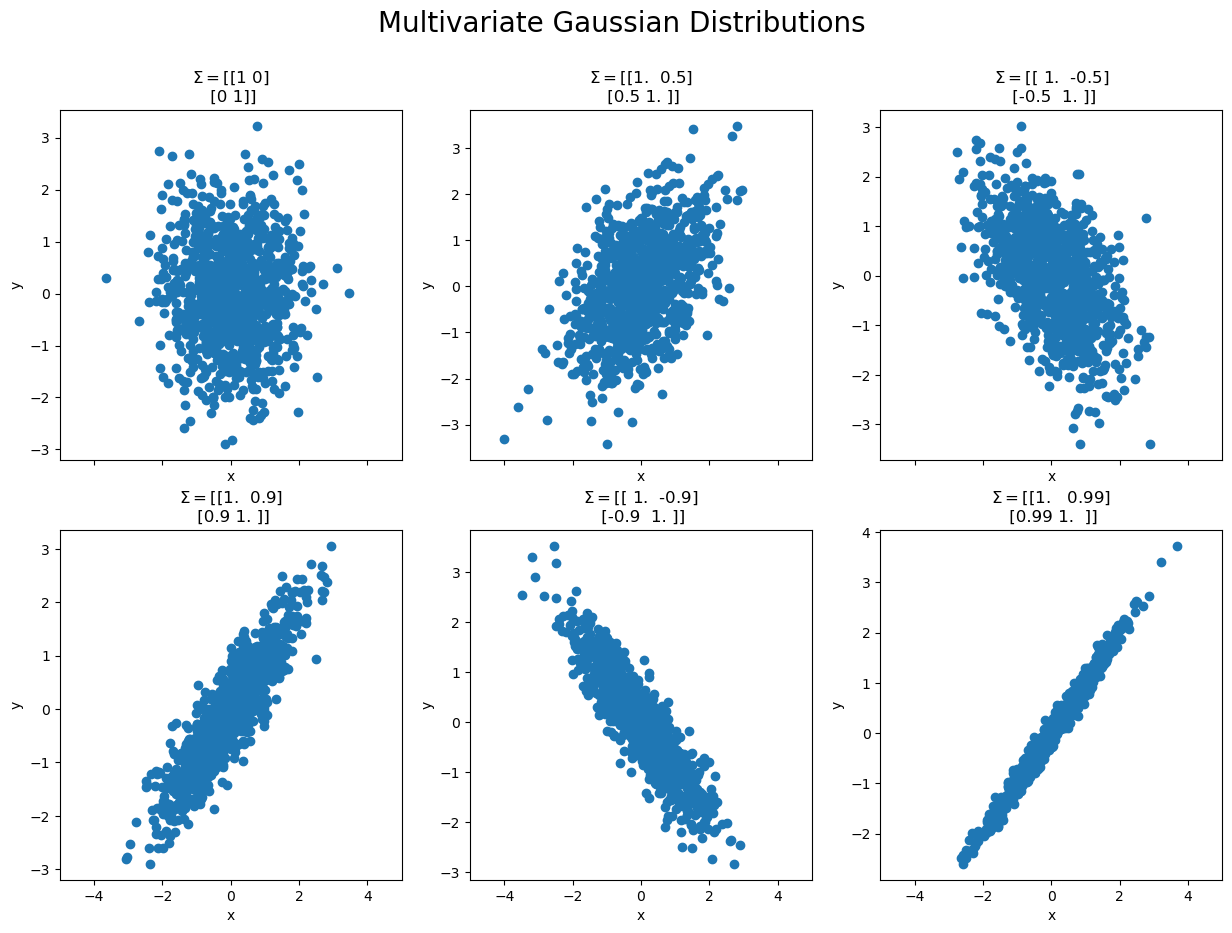

In [5]:
# set the mean
mean = np.array([0, 0])

# create list of covariance matrices
covs = [np.array([[1, 0], [0, 1]]),
        np.array([[1, 0.5], [0.5, 1]]),
        np.array([[1, -0.5], [-0.5, 1]]),
        np.array([[1, 0.9], [0.9, 1]]),
        np.array([[1, -0.9], [-0.9, 1]]),
        np.array([[1, 0.99], [0.99, 1]])]

# create a figure with 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True)
plt.suptitle('Multivariate Gaussian Distributions', fontsize=20)
# plot the gaussian distributions for each covariance matrix
# leave some space between the plots
for i, ax in enumerate(axs.flatten()):
        data = multivariate_normal(mean, covs[i]).rvs(1000)
        ax.scatter(data[:, 0], data[:, 1])
        ax.set_title(f'$\Sigma=${covs[i]}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_xlim(-5, 5)

We can see that as we increase the off-diagonal elements of the covariance matrix, the distribution becomes more and more linear suggesting a strong covariance between the components of the bi-variate distribution.

### Gaussian Discriminant Analysis Model
- Solving a classification problem 
- model $p(x|y)$ using a multivariate normal distribution 
$$\begin{align*}
y \sim Bernoulli(\phi) \\
x|y=0 \sim \mathcal{N}(\mu_0, \Sigma) \\
x|y=1 \sim \mathcal{N}(\mu_1, \Sigma) \\
\end{align*}
$$

$$\begin{align*}
p(y) &= \phi^y(1 - \phi)^{1 - y} \\
p(x|y = 0) &= \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(\frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x - \mu_0)) \\ 
p(x|y = 1) &= \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(\frac{1}{2}(x - \mu_1)^T\Sigma^{-1}(x - \mu_1)) \\
\end{align*}
$$

The log likelihood of the data is given by - 
$$\begin{align*}
l(\phi, \mu_0, \mu_1, \Sigma) &= log \Pi_{i = 1}^n p(x^{(i)}, y^{(i)}; \phi, \mu_0, \mu_1, \Sigma) \\
&= log \Pi_{i=1}^n p(x^{(i)}| y^{(i)};\mu_0, \mu_1, \Sigma)p(y^{(i)};\phi)

\end{align*}
$$

To find the values of the parameters which maximize the likelihood of the given data, we take the partial derivative of the log likelihood wrt the unknown parameters. 

$$
\begin{align*}
\frac{\partial l(\phi, \mu_0, \mu_1, \Sigma)}{\partial \phi} &= \frac{\delta}{\partial \phi} log \Pi p(y^{(i)}, \phi) \\
&= \Sigma_i\frac{\partial}{\partial \phi} log(p(y^{(i)};\phi)) \\
&= \Sigma_i\frac{\partial}{\partial \phi} log(\phi^{y^{(i)}}(1 - \phi)^{(1 - y^{(i)})}) \\
&= \Sigma_i [y^{(i)}\frac{1}{\phi} + (1-y^{(i)})\frac{1}{1 - \phi}] \\
\therefore \hat{\phi} &= argmax_{\phi} \frac{\partial l}{\partial \phi} \\
\end{align*}
$$
$\hat{\phi}$ is the solution to the following equation 
$$\begin{align*}
\Sigma_i [y^{(i)}\frac{1}{\phi} + (1-y^{(i)})\frac{1}{1 - \phi}]  &= 0 \\
\frac{\Sigma_1y^{(i)}}{\phi} - \frac{1-y^{(i)}}{1 - \phi} &= 0 \\
\Sigma y^{(i)} - \phi \Sigma y^{(i)} - n\phi + \phi\Sigma(y^(i)) &= 0\\
\hat{\phi} &= \frac{\Sigma y^{(i)}}{n}
\end{align*}
$$

Similarly - 
$$\begin{align*}
\frac{\partial l}{\partial \mu_0} &= \Sigma_i\frac{\partial}{\partial \mu_0}p(x^{(i)} | y^{(i)};\mu_0, \mu_1, \Sigma) \\
&= \Sigma_i 1(y^{(i)} = 0)\frac{\partial }{\partial \mu_0}  log \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(\frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x - \mu_0)) \\
&= \Sigma_i 1(y^{(i)} = 0)\frac{\partial }{\partial \mu_0} (log(\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}) + \frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x^{(i)} - \mu_0)) \\
&= \frac{1}{2}\Sigma_i 1(y^{(i)} = 0)\frac{\partial }{\partial \mu_0} \frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x^{(i)} - \mu_0)) \\
&= \frac{1}{2}\Sigma_i 1(y^{(i)} = 0)\Sigma^{-1}(x - \mu_0)
\end{align*}
$$
$\therefore \hat{\mu_0}$ is the solution of the following equation.
$$\begin{align*}
\Sigma_i 1(y^{(i)} = 0)(x^{(i)} - \mu_0) &= 0 \\
\hat{\mu_0} &= \frac{\Sigma_{i=1}^n1(y^{(i)} = 0)x^{(i)}}{\Sigma_i1(y^{(i)} = 0)}
\end{align*}
$$
Similarly by symmetry - 
$$
\hat{\mu_1} = \frac{\Sigma_{i=1}^n1(y^{(i)} = 1)x^{(i)}}{\Sigma_i1(y^{(i)} = 1)}
$$

>Some Matrix Identities - 
>- $tr[AB] = tr[BA]$
>- If $x^TAx$ is scaler then $x^TAx = tr[x^TAx] = tr[xx^TA]$
>- $\frac{\partial}{\partial A}tr(AB) = B^T$
>- $|A| = \frac{1}{|A^{-1}|}$
>- $\frac{\partial}{\partial A}log |A| = (A^{-1})^T = (A^T)^{-1}$
>- $\frac{\partial}{\partial A} x^TAx = \frac{\partial}{\partial A} tr(x^Tax) = \frac{\partial}{\partial A} tr(xx^TA) = xx^T$

Now we find the partial derivative of the log likelihood wrt $\Sigma^{-1}$
$$\begin{align*}
\frac{\partial}{\partial \Sigma^{-1}}l(x^{i}, y^{i};\mu_0, \mu_1, \Sigma, \phi) &= \frac{\partial}{\partial \Sigma^{-1}}\Sigma_i p(x^{(i)}|y^{(i)};\mu_0, \mu_1, \Sigma)p(y^{i}|\phi)\\
&= \frac{\partial}{\partial \Sigma^{-1}}(\Sigma_i C -\Sigma_i log(|\Sigma|^{1/2}) - \frac{1}{2}\Sigma_i(x - \mu_{y^{(i)}})^T\Sigma^{-1}(x^{(i)} - \mu_{y^{(i)}})) \\
&= \frac{n}{2}\frac{\partial}{\partial \Sigma^{-1}}log(|\Sigma^{-1}|) - \frac{1}{2}\Sigma_i(x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T \\
&= \frac{n}{2}\Sigma - \frac{1}{2}\Sigma_i(x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T
\end{align*}
$$

$\therefore$ the optimal value of the $\Sigma$ is given by the solution of the following equation - 
$$\begin{align*}
\frac{n}{2}\Sigma - - \frac{1}{2}\Sigma_i(x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T &= 0 \\
\implies \hat{\Sigma} = \frac{1}{n}\Sigma_i(x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T
\end{align*}
$$

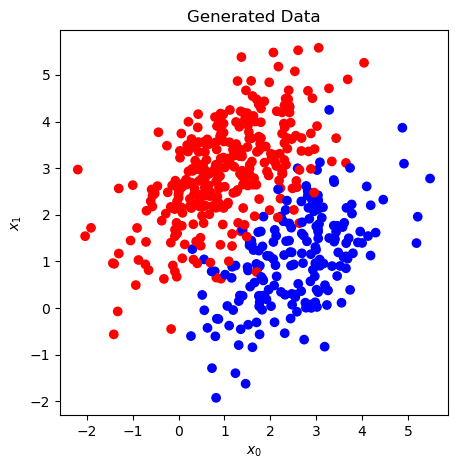

mu0_hat.shape=(2,)
mu1_hat.shape=(2,)
sigma_hat.shape=(2, 2)
data[0].shape=(2,)
data[labels == 0].shape=(304, 2)
data[labels == 1].shape=(196, 2)
phi_hat=0.392
mu0_hat=array([1.02384611, 2.89174334])
mu1_hat=array([2.52994116, 1.03418318])
sigma_hat=array([[1.0955522 , 0.60478766],
       [0.60478766, 1.07902542]])


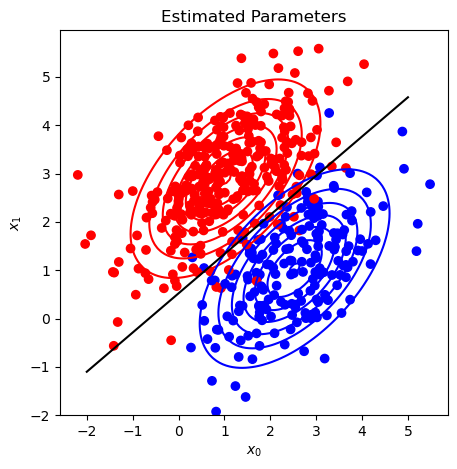

In [38]:
phi = 0.4
mu0 = np.array([1, 3])
mu1 = np.array([2.5, 1])

sigma = np.array([[1, 0.5], [0.5, 1]])

data = []
labels = []
n_samples = 500
for i in range(n_samples):
    if np.random.binomial(1, p = 0.4) < phi:
        data.append(np.random.multivariate_normal(mu0, sigma))
        labels.append(0)
    else:
        data.append(np.random.multivariate_normal(mu1, sigma))
        labels.append(1)

data = np.array(data)
labels = np.array(labels)
colors = ['red', 'blue']
plt.figure(figsize=(5,5))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Generated Data')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

# find the estimates for the parameters
phi_hat = np.mean(labels)
mu0_hat = np.mean(data[np.where(labels == 0)[0]], axis=0)
mu1_hat = np.mean(data[np.where(labels == 1)[0]], axis=0)
sigma_hat = np.zeros((2, 2))

print(f'{mu0_hat.shape=}')
print(f'{mu1_hat.shape=}')
print(f'{sigma_hat.shape=}')
print(f'{data[0].shape=}')
print(f'{data[labels == 0].shape=}')
print(f'{data[labels == 1].shape=}')
for i in range(n_samples):
    if labels[i] == 0:
        sigma_hat += np.outer(data[i] - mu0_hat, data[i] - mu0_hat)
    else:
        sigma_hat += np.outer(data[i] - mu1_hat, data[i] - mu1_hat)
sigma_hat /= n_samples

print(f'{phi_hat=}')
print(f'{mu0_hat=}')
print(f'{mu1_hat=}')
print(f'{sigma_hat=}')

# and plot the line
slope = (mu1_hat[1] - mu0_hat[1]) / (mu1_hat[0] - mu0_hat[0])
# slope of perpendicular line
slope_perp = -1 / slope
# find the middle point
midpoint = (mu0_hat + mu1_hat) / 2


# plot the countour of the gaussian distributions and the line where p(y=1|x) = 0.5
# and the generated data
x = np.linspace(-2, 5, 100)
y = np.linspace(-2, 5, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv0 = multivariate_normal(mu0_hat, sigma_hat)
rv1 = multivariate_normal(mu1_hat, sigma_hat)
x_ = np.linspace(-2, 5, 100)
y_ = slope_perp * (x_ - midpoint[0]) + midpoint[1]
plt.figure(figsize=(5,5))
plt.contour(X, Y, rv0.pdf(pos), colors='red')
plt.contour(X, Y, rv1.pdf(pos), colors='blue')
plt.plot(x_, y_, color='black')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Estimated Parameters')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()



The above figure shows the decision boundary for GDA, we predict $y = 1$ if the point falls below the line else we predict $y=0$

## GDA vs Logistic Regression

We can show that GDA with shared $\Sigma$ is equivalent to logistic regression - 
$$\begin{align*}
P(y=1|x) &= \frac{P(x|y = 1)P(y = 1)}{P(x)} \\
\frac{P(y=1|x)}{P(y=0|x)} &= \frac{\phi P(x|y = 1)}{(1 - \phi)P(x|y = 0)} \\ 
ln(\frac{P(y=1|x)}{P(y=0|x)}) &= ln(\frac{\phi}{1 - \phi}) +\frac{1}{2}[(\mu_1 - \mu_0)^T\Sigma^{-1}x] + \frac{(\mu_0\Sigma^{-1}\mu_0 - \mu_1\Sigma^{-1}\mu_1)}{2} \\ 
&= ln(\frac{\phi}{1 - \phi}) + \frac{(\mu_0\Sigma^{-1}\mu_0 - \mu_1\Sigma^{-1}\mu_1)}{2} +\frac{1}{2}(\mu_1 - \mu_0)^T\Sigma^{-1}x
\end{align*}
$$
*[Derivation](https://stats.stackexchange.com/questions/251069/gaussian-discriminant-analysis-and-sigmoid-function)*

LHS of the above equation represents the link function for the logistic regression - 
$$
ln(\frac{y}{1 - y}) = \Theta^TX
$$

$\therefore$ comparing the two equations - 
$$
\Theta = \begin{bmatrix}
ln(\frac{\phi}{1 - \phi}) + \frac{(\mu_0\Sigma^{-1}\mu_0 - \mu_1\Sigma^{-1}\mu_1)}{2} \\
\\
\frac{1}{2}(\mu_1 - \mu_0)^T\Sigma^{-1}
\end{bmatrix}
$$
$$
X = \begin{bmatrix}
1 \\
x
\end{bmatrix}
$$

### When to use GDA and when to use Logistic Regression?

|GDA|Logistic|
|--|--|
|$p(x\|y)\sim N(\mu, \Sigma) \implies p(y\|x)$ is logistic | $p(y\|x)$ is logistic $\;\not\!\!\!\implies p(x\|y)\sim N(\mu, \Sigma)$|
|GDA  makes stringer modelling assumptions and is more data efficient if the assumptions are corrent.|Logistic regression is *more robust* and less sensitive to data distribution.|

## Naive Bayes 

Now we look into a specific case where the feature vectors are discrete. Let us consider an example where we are building a model which classifies weather an email is spam or not i.e. an example of test classification model. 

The feature vector of any given training example is a $d$ dimensional vector $x$. Where each element of $x$, $x_j \in \{0, 1\}$ indicating weather a given word at index $j$ is present in the email or not. i.e. - 

$$
x = 
\begin{bmatrix}
0 \\
0 \\
1 \\
. \\
. \\
. \\
0 \\
1 \\
. \\
0 
\end{bmatrix}_{d\times1}
$$

Now the total number of possibilities for $x$ is $2^d - 1$. If we model $p(x|y)$ explicitly as a multinomial distribution over all possible values of vector $x$ we'll have a parameter vector of size $2^d - 1$ which increases exponentially with vocabulary size $d$. The classification model is given by the bayes theorem - 

$$
p(y|x) = \frac{p(x|y)p(y)}{p(x)}
$$

To simplify the calculation of $p(x|y) = p(x_1, ..., x_d|y)$, we make a strong assumption about the model that the $x_j's$  are conditionally independent given $y$. This assumption is called the **Naive Bayes** assumption and the resulting classifier is called the **Naive Bayes Classifier**. $\therefore$ the probability calculation becomes easier as - 
$$\begin{align*}
p(x|y) &= p(x_1, ..., x_d|y) \\
&= p(x_1|y)p(x_2|y)...p(x_d|y) \\
&= \Pi_{j=1}^dp(x_j|y)
\end{align*}
$$


The model is parameterized by the following parameters - 
- $\phi_{j|y=1} = p(x_j = 1|y = 1)$
- $\phi_{j|y=0} = p(x_j = 1|y = 0)$
- $\phi_y = p(y = 1)$

The likelihood is given by - 
$$\begin{align*}
\mathcal{L}(\phi_{j|y=1}, \phi_{j|y=0}, \phi_y) &= \Pi_{i=0}^{n}p(x^{(i)}, y^{(i)}) \\
&= \Pi_{i=0}^{n}p(x^{(i)}|y^{(i)})p(y^{(i)}) \\
&= \Pi_{i=0}^{n}[\Pi_{j=0}^{d}p(x^{(i)}_d|y^{(i)})]p(y^{(i)})
\end{align*}
$$

Log-likelihood is given by - 

$$\begin{align*}
l &= \Sigma_{i=1}^n\{\Sigma_{j=0}^dln(p(x^{(i)}_d|y^{(i)})) + ln(p(y^{(i)})\} \\ 
&= \Sigma_{i=1}^n \left\{ \Sigma_{j=0}^d ln\left[(\phi_{j|y^{(i)} = 1})^{x^{(i)}_j}(1 - \phi_{j|y^{(i)} = 1})^{1-x^{(i)}_j}\right]^{y^{(i)}} \left[(\phi_{j|y^{(i)} = 0})^{x^{(i)}_j}(1 -\phi_{j|y^{(i)} = 1})^{1 - x^{(i)}_j}\right]^{1 - y^{(i)}} \right\} + \Sigma_{i=0}^n\left\{ln\left[(\phi_{y}^{y^{(i)}})(1 - \phi_y)^{1 - y^{(i)}}\right]\right\} \\
&= \Sigma_{i=1}^n\left\{\Sigma_{j = 0}^d\left[x_j^{(i)}y^{(i)}ln(\phi_{j|y^{(i)} = 1}) + (1-x_j^{(i)})y^{(i)}ln(1 - \phi_{j|y^{(i)}=1}) + x_{j}^{(i)}(1 - y^{(i)})ln(1 - \phi_{j|y^{(i)} = 0}) 
+ (1-x_j^{(i)})(1 - y^{(i)})ln(1 - \phi_{j|y^{(i)}=0})\right]\right\}  \\
&+ \Sigma_{i=1}^{n}\left\{y^{(i)}ln\phi_y + (1 - y^{(i)})ln(1 - \phi_y)\right\}
\end{align*}
$$

To find the optimal value of the parameter $\phi_{j|y=1}$, we take the partial derivative of the $l$ w.r.t $\phi_{j|y=1}$ - 

$$\begin{align*}
\frac{\partial l}{\partial \phi_{j|y=1}} &= \Sigma_{i=1}^{n} y^{(i)} \left\{\Sigma_{j=1}^{d} x_{j}^{(i)}y^{(i)} ln(\phi_j|y^{(i) = 1}) \right\}
\end{align*}
$$

Equating the above equation to zero we get - 
$$\begin{align*}
\Sigma_{i=1}^{n} y^{(i)} \left\{\Sigma_{j=1}^{d} x_{j}^{(i)}y^{(i)} ln(\phi_j|y^{(i) = 1})\right\} &= 0 \\
\Sigma_{i=1}^{n} y^{(i)} \left[x_j^{(i)} - \phi_{j|y^{(i)} = 1}\right] &= 0\\
\hat{\phi_{j|y = 1}} &= \frac{\Sigma_{i=1}^{n}y^{(i)}x_{j}^{(i)}}{\Sigma_{i=1}^n} \\ 
&= \frac{\Sigma_{i=1}^{n}1\{x_{j}^i \wedge y^{(i)}\}}{\Sigma_{i=1}^n y^{(i)}}
\end{align*}
$$

Similarly other parameters can be found as well - 
$$\begin{align*}
\hat{\phi_{j|y=0}} &= \frac{\Sigma_{i=1}^{n}1\{x_{j}^i \wedge (y^{(i)} = 0)\}}{\Sigma_{i=1}^n 1 - y^{(i)}}\\
\hat{\phi_{y}} &= \frac{\Sigma_{i}y^{(i)}}{n}
\end{align*}
$$

We can make the inferences as follows - 
$$
\begin{align*}
p(y = 1|x) &= \frac{p(x|y=1)p(y=1)}{p(x)} \\ 
&= \frac{\left(\Pi_{j=1}^dp(x_j|y=1)\right)p(y=1)}{\left(\Pi_{j=1}^dp(x_j|y=1)\right)p(y=1) + \left(\Pi_{j=1}^dp(x_j|y=0)\right)p(y=0)} \\
\end{align*}
$$

### Laplace Smoothing 

There's one major flaw in the modeling the distribution of the $x_j's$ in the previous example. Let's say we are modelling for the email span classification. While our training set was from the years 2010-2015, and then we test for the emails coming in 2016 onwards, the word *selfie* may not appear in our training set and if we see estimate the parameters of the token, we get - 
$$\begin{align*}
\phi_{j|y=1} &= \frac{\Sigma_{i=1}^n 1\{x_j^{(i)}\wedge y^{(i)}\}}{\Sigma_{i=1}^n y^{(i)}} = 0\\
\phi_{j|y=0} &= 0
\end{align*}
$$

As we haven't seen the word selfie in our training set, we are unable to estimate weather an email with this word is spam or not. When we try to make a prediction based on our estimated parameters - 
$$
\begin{align*}
p(y=1|x) &= \frac{\left(\Pi_{j=1}^dp(x_j|y=1)\right)p(y=1)}{\left(\Pi_{j=1}^dp(x_j|y=1)\right)p(y=1) + \left(\Pi_{j=1}^dp(x_j|y=0)\right)p(y=0)} \\
&= \frac{0}{0}
\end{align*}
$$